In [73]:
# Importing libraries to play with data
import numpy as np
import pandas as pd

from sklearn_pandas import DataFrameMapper
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import functools
import xgboost
from xgboost import XGBClassifier

In [75]:
# Importing the train data itself
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

# Importing the test data itself
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [76]:
#setting column names 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [77]:
#showing top 5 records of training set
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [78]:
#showing top 5 records of test set
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [79]:
#showing size of train dataset
train_set.shape

(32561, 15)

In [80]:
#showing size of test dataset
test_set.shape

(16281, 15)

In [81]:
#getting all values of workclass column
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [82]:
#getting all values of education column
train_set.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [83]:
#getting all values of country column
train_set.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [84]:
#how many unique categories we have in occupation 
occupation_set = set(train_set['occupation'])
print(occupation_set)

{' Farming-fishing', ' Armed-Forces', ' Prof-specialty', ' Machine-op-inspct', ' Craft-repair', ' ?', ' Handlers-cleaners', ' Priv-house-serv', ' Transport-moving', ' Adm-clerical', ' Protective-serv', ' Exec-managerial', ' Other-service', ' Sales', ' Tech-support'}


In [85]:
#Now classify them as numers instead of their names in train set
train_set['occupation'] = train_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [86]:
# Now classify them as numers instead of their names in test set
test_set['occupation'] = test_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [87]:
#Just printing top 5 records to see if nothing gone wrong
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,3,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,7,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,4,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,4,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,<=50K


In [88]:
#Just printing top 5 records to see if nothing gone wrong
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.


In [89]:
#mapping wage_class(income) into integer columns to classify over train dataset
train_set['wage_class'] = train_set['wage_class'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [90]:
#mapping wage_class(income) into integer columns to classify over test dataset
test_set['wage_class'] = test_set['wage_class'].map({' <=50K.': 0, ' >50K.': 1}).astype(int)

In [91]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

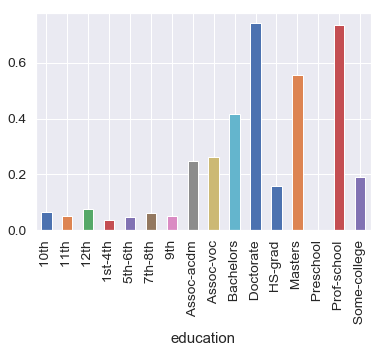

In [92]:
#plotting graph to show relation between wage_class(income) and education 
train_set.groupby('education')['wage_class'].mean().plot(kind='bar')

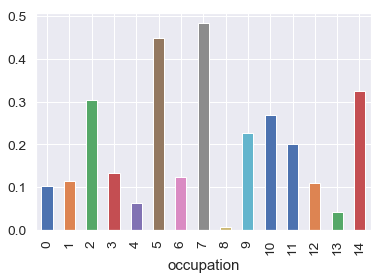

In [93]:
#plotting graph to show relation between wage_class(income) and occupation 
train_set.groupby('occupation')['wage_class'].mean().plot(kind='bar')

In [94]:
#Transforming the Sex into 0 and 1
train_set['sex'] = train_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [95]:
#Transforming the Sex into 0 and 1
test_set['sex'] = test_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [96]:
#Getting how many unique races we have here.
race_set = set(train_set['race'])
print(race_set)

{' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Black', ' White', ' Other'}


In [97]:
#mapping races to integer values in train dataset
train_set['race'] = train_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [98]:
#mapping races to integer values in test dataset
test_set['race'] = test_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [99]:
#Getting how many unique maritial status we have here.
mstatus_set = set(train_set['marital_status'])
print(mstatus_set)

{' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse'}


In [100]:
#mapping maritial status to integer values in train dataset
train_set['marital_status'] = train_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [101]:
#mapping maritial status to integer values in test dataset
test_set['marital_status'] = test_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [102]:
#showing top 5 records
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,5,3,Not-in-family,3,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,7,Husband,3,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,4,4,Not-in-family,3,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,4,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,5,Wife,0,1,0,0,40,Cuba,0


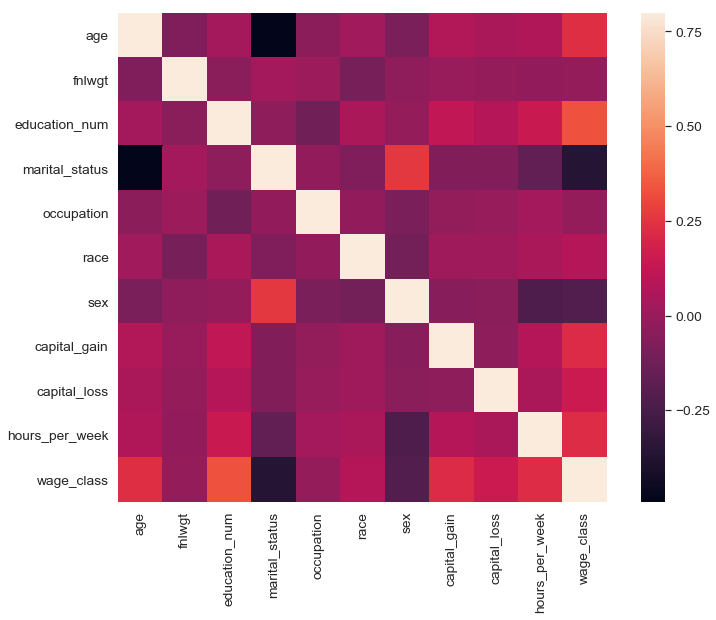

In [103]:
#importing seaborn library to find relation between features
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = train_set.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

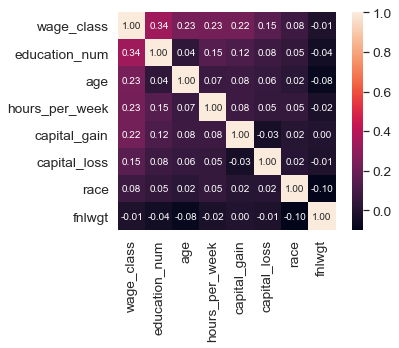

In [104]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'wage_class')['wage_class'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

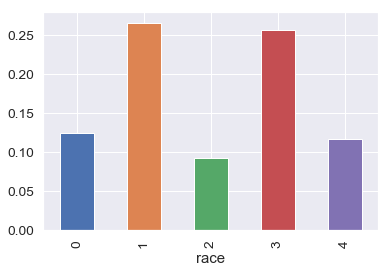

In [105]:
#plotting income classified by race
train_set.groupby('race')['wage_class'].mean().plot(kind='bar')

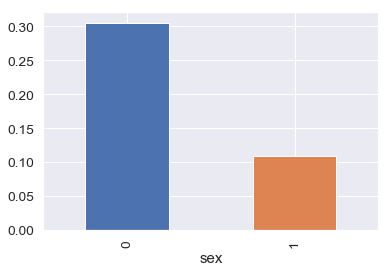

In [106]:
#plotting income classified by sex
train_set.groupby('sex')['wage_class'].mean().plot(kind='bar')

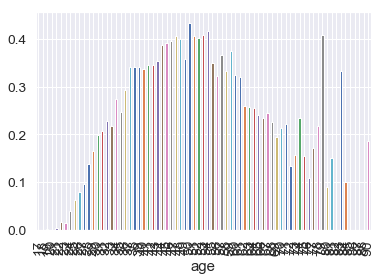

In [107]:
#plotting income classified by age
train_set.groupby('age')['wage_class'].mean().plot(kind='bar')

In [108]:
"""
Conclusion:
We achieved our goal by seeing the data closer, trying to understand it's realtions among the features.
After that, we explore the data a little bit more and learnt that:

1.Men have more chances to have a higher income.
2.White and Asian Pacific Islanders have more chances than other races
3.Income sort of follows the normal deviation, with a peak at 50 years old

"""

"\nConclusion:\nWe achieved our goal by seeing the data closer, trying to understand it's realtions among the features.\nAfter that, we explore the data a little bit more and learnt that:\n\n1.Men have more chances to have a higher income.\n2.White and Asian Pacific Islanders have more chances than other races\n3.Income sort of follows the normal deviation, with a peak at 50 years old\n\n"

In [109]:
# Taking only the features that is important for now
X_train = train_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]

# Taking the labels(Income)
Y_train = train_set['wage_class']

# Taking only the features that is important for now
X_test = test_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]

# Taking the labels(Income)
Y_test = test_set['wage_class']

In [110]:
#creating instance of XGBoost classifier
classifier = XGBClassifier()

#fitting data into our model
classifier.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [111]:
#predicting output of test set from trained model
Y_pred = classifier.predict(X_test)

In [112]:
#importing library to find accuracy of the model
from sklearn.metrics import confusion_matrix

In [113]:
#getting confusion matrix of the output result
cm = confusion_matrix(Y_test,Y_pred)

In [114]:
#printing the confusion matrix
print(cm)

[[11934   501]
 [ 2274  1572]]


In [115]:
#importing library to cross validate the model on training dataset
from sklearn.model_selection import cross_val_score

In [116]:
#getting accuracies-set from cross validation test
accuracies = cross_val_score(estimator=classifier,X = X_train,y = Y_train,cv = 10)

In [117]:
#finding mean of all accuracies
accuracies.mean()

0.8291517928875928

In [118]:
#finding standard deviation of accuracies
accuracies.std()

0.006337788569732528